In [1]:
import pandas as pd
import datetime as dt
import numpy as np 
import matplotlib.pyplot as plt
from math import sin, cos, sqrt, atan2, radians
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold


%matplotlib inline

In [2]:
print("Loading Training and Testing Data =====>")
training_data = pd.read_csv(r'C:\Users\ASUS\Documents\jbg_ml\taxi\train\train.csv')
testing_data = pd.read_csv(r'C:\Users\ASUS\Documents\jbg_ml\taxi\test\test.csv')
print("<===== Training and Testing Data Loading finished")
sample=pd.read_csv(r'C:\Users\ASUS\Documents\jbg_ml\taxi\sample_submission\sample_submission.csv')

Loading Training and Testing Data =====>
<===== Training and Testing Data Loading finished


In [3]:
training_data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [4]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [5]:
training_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [6]:
training_data.id.nunique()

1458644

In [7]:
training_data.groupby('vendor_id').vendor_id.count()

vendor_id
1    678342
2    780302
Name: vendor_id, dtype: int64

In [8]:
np.max(training_data.passenger_count)

9

In [9]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
id                    625134 non-null object
vendor_id             625134 non-null int64
pickup_datetime       625134 non-null object
passenger_count       625134 non-null int64
pickup_longitude      625134 non-null float64
pickup_latitude       625134 non-null float64
dropoff_longitude     625134 non-null float64
dropoff_latitude      625134 non-null float64
store_and_fwd_flag    625134 non-null object
dtypes: float64(4), int64(2), object(3)
memory usage: 42.9+ MB


In [10]:
testing_data.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [11]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 2 columns):
id               625134 non-null object
trip_duration    625134 non-null int64
dtypes: int64(1), object(1)
memory usage: 9.5+ MB


In [12]:
def convert_datetime(s):
    if type(s)==str:
        return dt.datetime.strptime(s, '%Y-%m-%d %H:%M:%S')
    else:
        return s
    
def get_hour(d):
    return d.hour

def get_weekday(d):
    weekday = d.isoweekday()
    return weekday

# def get_geohash(row):
#     return geohash.encode(row['pickup_latitude'], row['pickup_longitude'], precision=6)

def get_distance(lat1, long1, lat2, long2):
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(long1)
    
    lat2 = radians(lat2)
    lon2 = radians(long2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    
    #in km
    return distance

def distance(row):
    return get_distance(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude'])

In [13]:
training_data.pickup_datetime = training_data.pickup_datetime.apply(convert_datetime)
training_data['hour'] = training_data.pickup_datetime.apply(get_hour)
training_data['weekday'] = training_data.pickup_datetime.apply(get_weekday)
training_data['month'] = training_data.pickup_datetime.dt.month
training_data['Eucl_distance'] = training_data.apply(distance, axis=1)

In [14]:
training_data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,hour,weekday,month,Eucl_distance
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02,1.360648e+01,4.050375e+00,3.516818e+00,3.441944e+00
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03,6.399693e+00,1.954039e+00,1.681038e+00,4.297887e+00
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02,9.000000e+00,2.000000e+00,2.000000e+00,1.232223e+00
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02,1.400000e+01,4.000000e+00,4.000000e+00,2.094374e+00
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03,1.900000e+01,6.000000e+00,5.000000e+00,3.876554e+00
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06,2.300000e+01,7.000000e+00,6.000000e+00,1.241298e+03


In [15]:
print("Number of ids in the train dataset: ", len(training_data["id"]))
print("Number of unique ids in the train dataset: ", len(pd.unique(training_data["id"])), "\n")

print("Number of ids in the test dataset: ", len(testing_data["id"]))
print("Number of unique ids in the test dataset: ", len(pd.unique(testing_data["id"])), "\n")

print("Number of common ids(if any) between the train and test datasets: ", \
len(set(training_data["id"].values).intersection(set(testing_data["id"].values))))

Number of ids in the train dataset:  1458644
Number of unique ids in the train dataset:  1458644 

Number of ids in the test dataset:  625134
Number of unique ids in the test dataset:  625134 

Number of common ids(if any) between the train and test datasets:  0


In [16]:
print("Number of vendor_ids in the train dataset: ", len(training_data["vendor_id"]))
print("Number of unique vendor_ids in the train dataset: ", len(pd.unique(training_data["vendor_id"])), "\n")

print("Number of vendor_ids in the test dataset: ", len(testing_data["vendor_id"]))
print("Number of unique vendor_ids in the test dataset: ", len(pd.unique(testing_data["vendor_id"])), "\n")


Number of vendor_ids in the train dataset:  1458644
Number of unique vendor_ids in the train dataset:  2 

Number of vendor_ids in the test dataset:  625134
Number of unique vendor_ids in the test dataset:  2 



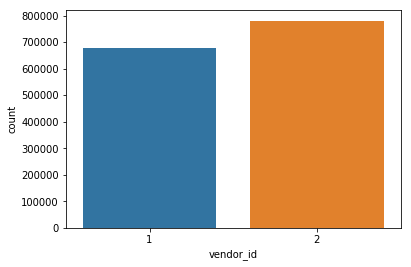

In [17]:
sns.countplot(x="vendor_id",data=training_data)

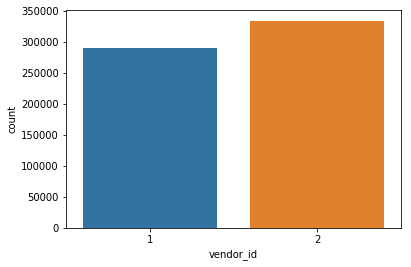

In [18]:
sns.countplot(x="vendor_id",data=testing_data)

In [19]:
testing_data.pickup_datetime = testing_data.pickup_datetime.apply(convert_datetime)
training_data.dropoff_datetime = training_data.dropoff_datetime.apply(convert_datetime)


In [20]:
# #trip_duration represents the difference between the dropoff_datetime and the pickup_datetime in the
# #train dataset
training_data["trip_duration"].describe()

count    1.458644e+06
mean     9.594923e+02
std      5.237432e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64

In [21]:
(training_data["dropoff_datetime"] - training_data["pickup_datetime"]).describe()


count                   1458644
mean     0 days 00:15:59.492272
std      0 days 01:27:17.431724
min             0 days 00:00:01
25%             0 days 00:06:37
50%             0 days 00:11:02
75%             0 days 00:17:55
max            40 days 19:31:22
dtype: object

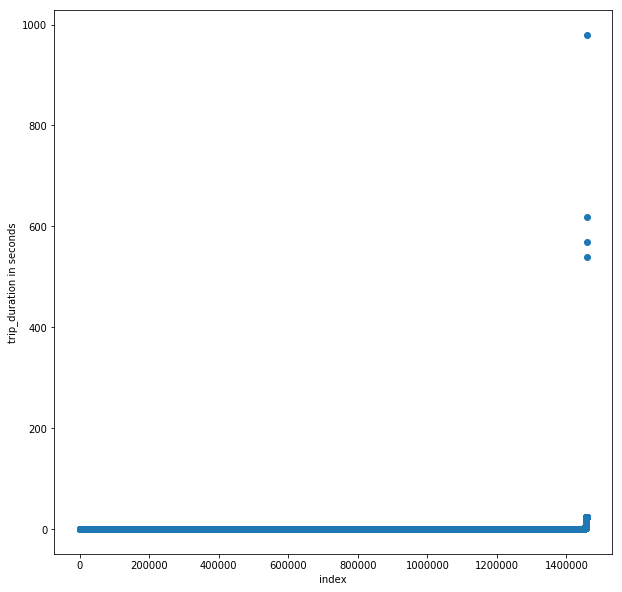

In [22]:
plt.figure(figsize=(10,10))
plt.scatter(range(len(training_data["trip_duration"]/3600)), np.sort(training_data["trip_duration"]/3600))
plt.xlabel('index')
plt.ylabel('trip_duration in seconds')
plt.show()

In [23]:
training_data = training_data[training_data["trip_duration"] < 500000]


In [24]:
(training_data["dropoff_datetime"] - training_data["pickup_datetime"]).describe()


count                   1458640
mean     0 days 00:15:52.815251
std      0 days 00:52:51.322283
min             0 days 00:00:01
25%             0 days 00:06:37
50%             0 days 00:11:02
75%             0 days 00:17:55
max             0 days 23:59:52
dtype: object

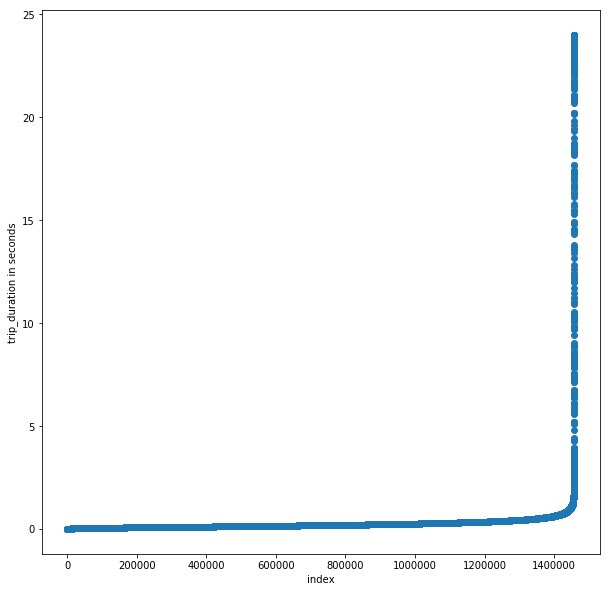

In [25]:
plt.figure(figsize=(10,10))
plt.scatter(range(len(training_data["trip_duration"]/3600)), np.sort(training_data["trip_duration"]/3600))
plt.xlabel('index')
plt.ylabel('trip_duration in seconds')
plt.show()

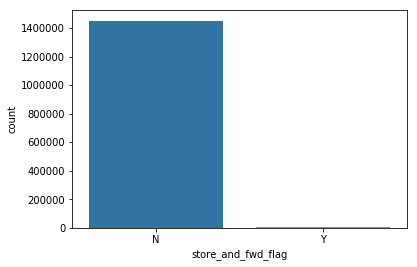

In [26]:
sns.countplot(x="store_and_fwd_flag", data=training_data)


In [27]:
len(training_data[training_data["store_and_fwd_flag"] == "N"])*100.0/(training_data.count()[0])


99.44845883836999

In [28]:
set(training_data[training_data["store_and_fwd_flag"] == "Y"]["vendor_id"])


{1}

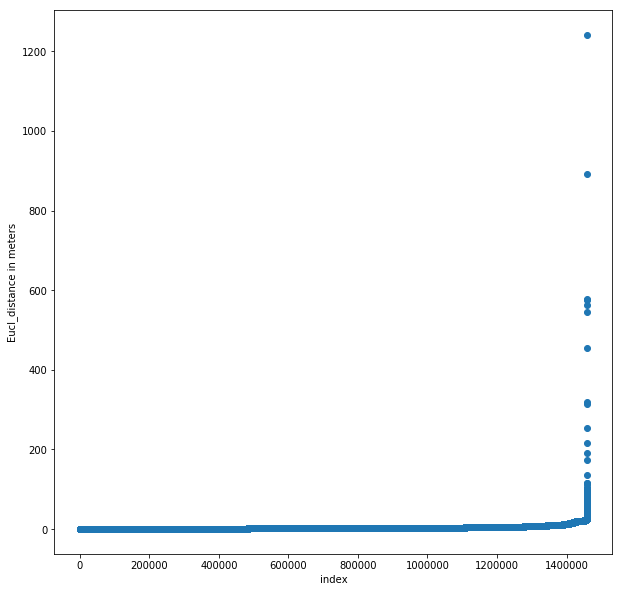

In [29]:
plt.figure(figsize=(10,10))
plt.scatter(range(len(training_data["Eucl_distance"])), np.sort(training_data["Eucl_distance"]))
plt.xlabel('index')
plt.ylabel('Eucl_distance in meters')
plt.show()

In [30]:
training_data = training_data[training_data["Eucl_distance"] < 600]


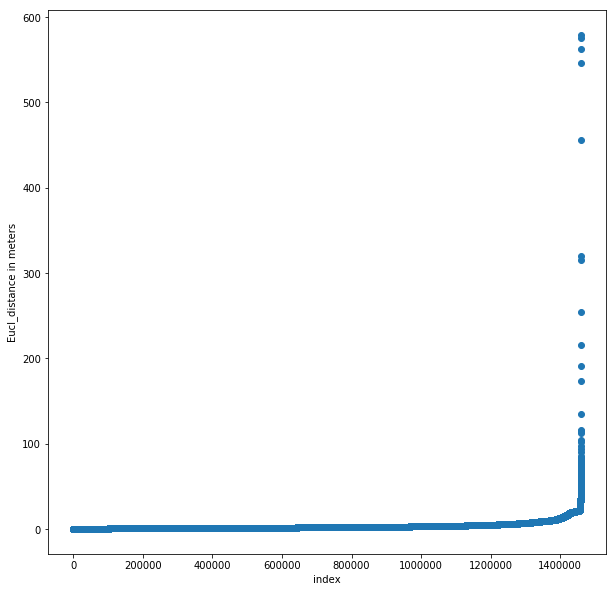

In [31]:
plt.figure(figsize=(10,10))
plt.scatter(range(len(training_data["Eucl_distance"])), np.sort(training_data["Eucl_distance"]))
plt.xlabel('index')
plt.ylabel('Eucl_distance in meters')
plt.show()

In [32]:
def count_elements(array):
    return len(pd.unique(array))

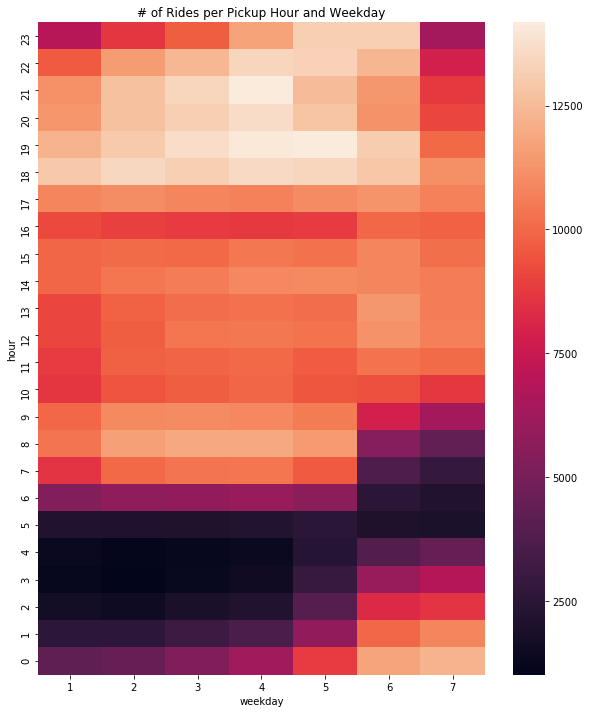

In [33]:
plt.figure(figsize=(10, 12))
pivot_2 = training_data.pivot_table(index='hour' , columns='weekday', values='id', aggfunc=count_elements)
pivot_2.sort_index(level=0, ascending=False, inplace=True)
ax2 = sns.heatmap(pivot_2)
ax2.set_title('# of Rides per Pickup Hour and Weekday')
plt.show()

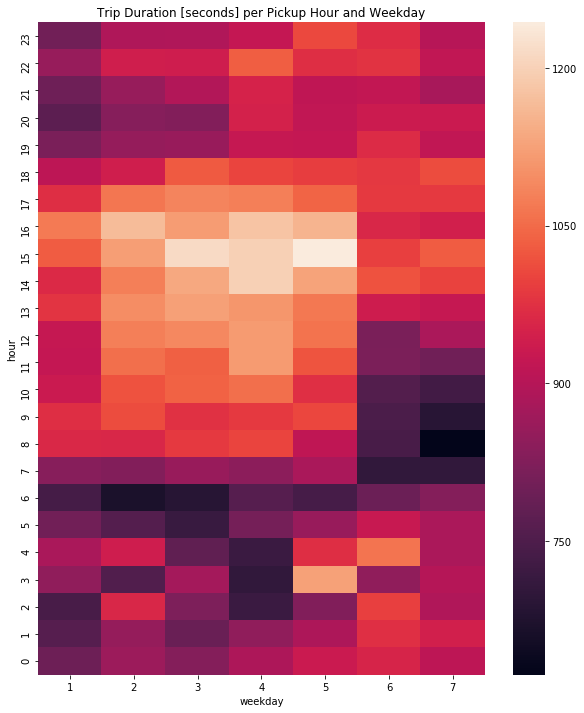

In [34]:
plt.figure(figsize=(10, 12))
pivot_1 = training_data.pivot_table(index='hour' , columns='weekday', values='trip_duration', aggfunc=np.mean)
pivot_1.sort_index(level=0, ascending=False, inplace=True)
ax3 = sns.heatmap(pivot_1)
ax3.set_title('Trip Duration [seconds] per Pickup Hour and Weekday')
plt.show()

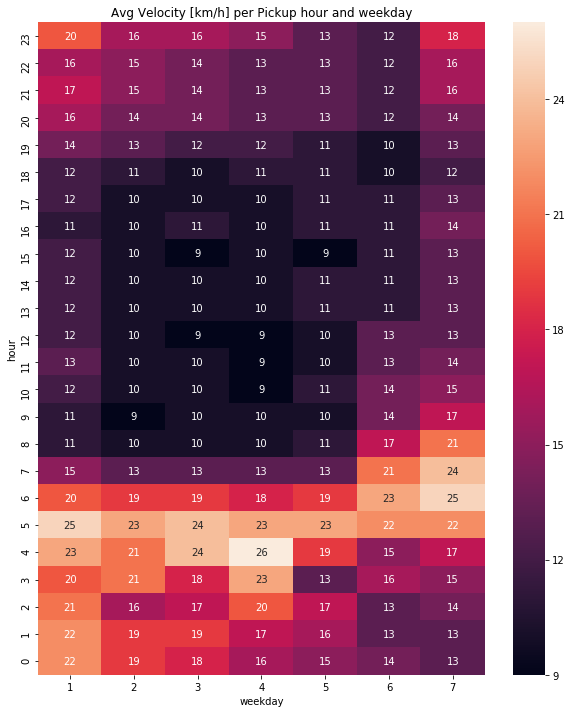

In [35]:
tab = training_data.pivot_table(index=['weekday', 'hour'] , values=['trip_duration', 'Eucl_distance'], aggfunc=np.sum)
tab['avg_velocity'] = tab['Eucl_distance'] / (tab['trip_duration']/3600)
tab = tab.reset_index()
tab.avg_velocity = tab.avg_velocity.astype(int)
plt.figure(figsize=(10, 12))
tab = tab.pivot('hour', 'weekday', 'avg_velocity')
tab.sort_index(level=0, ascending=False, inplace=True)
ax4 = sns.heatmap(tab, annot=True, fmt='d')
ax4.set_title('Avg Velocity [km/h] per Pickup hour and weekday')
plt.show()

In [36]:
training_data.trip_duration.describe()


count    1.458638e+06
mean     9.528156e+02
std      3.171324e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
max      8.639200e+04
Name: trip_duration, dtype: float64

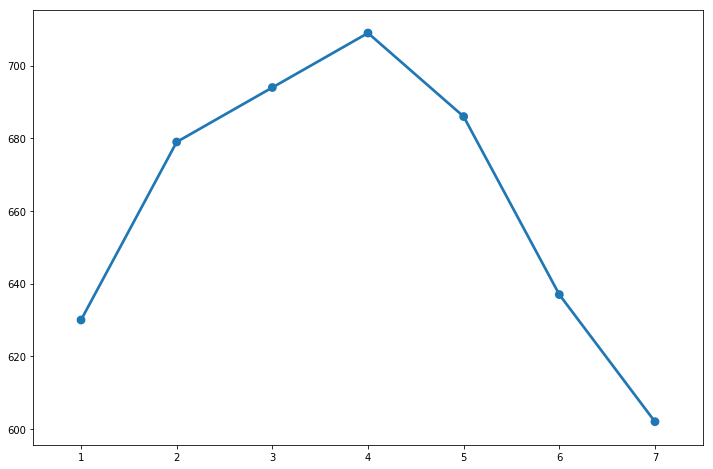

In [37]:
df_train_agg = training_data.groupby('weekday')['trip_duration'].aggregate(np.median).reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(df_train_agg.weekday.values, df_train_agg.trip_duration.values)
plt.show()

In [38]:
training_data.groupby('weekday')['trip_duration'].describe()


,count,mean,std,min,25%,50%,75%,max
weekday,,,,,,,,
1,187418.0,897.947839,2769.429213,1.0,380.0,630.0,1027.0,86392.0
2,202747.0,962.918401,3058.192485,1.0,407.0,679.0,1102.0,86391.0
3,210135.0,975.452228,2903.811946,1.0,416.0,694.0,1133.0,86366.0
4,218574.0,1006.528654,3100.383654,1.0,420.0,709.0,1155.0,86387.0
5,223533.0,990.224200,3274.974477,1.0,410.0,686.0,1112.0,86390.0
6,220865.0,922.814910,3515.790936,1.0,385.0,637.0,1012.0,86377.0
7,195366.0,901.639395,3456.093920,1.0,364.0,602.0,978.0,86369.0


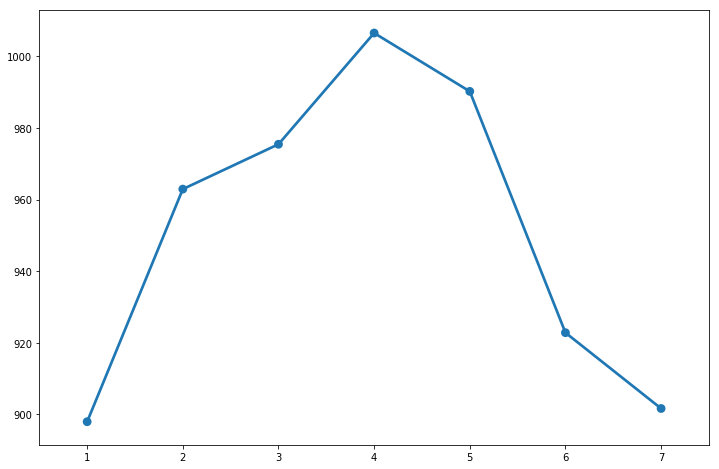

In [39]:
df_train_agg = training_data.groupby('weekday')['trip_duration'].aggregate(np.mean).reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(df_train_agg.weekday.values, df_train_agg.trip_duration.values)
plt.show()

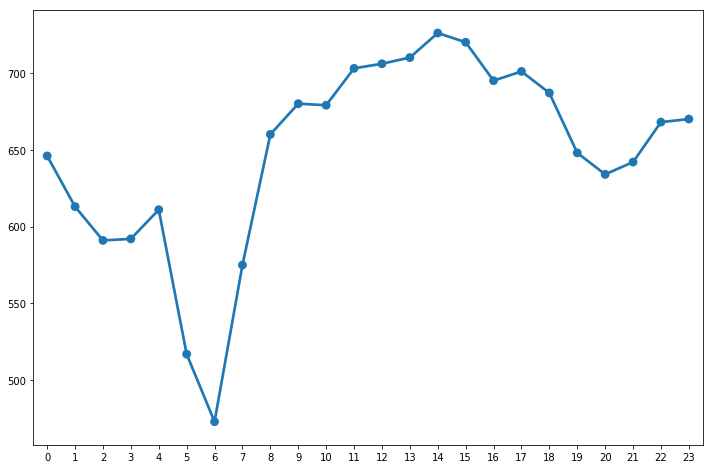

In [40]:
df_train_agg = training_data.groupby('hour')['trip_duration'].aggregate(np.median).reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(df_train_agg.hour.values, df_train_agg.trip_duration.values)
plt.show()

In [41]:
training_data.groupby('hour')['trip_duration'].describe()


,count,mean,std,min,25%,50%,75%,max
hour,,,,,,,,
0,53247.0,900.245873,3223.040076,1.0,389.00,646.0,1039.00,86390.0
1,38571.0,903.087112,3733.570656,2.0,371.00,613.0,977.00,86355.0
2,27972.0,890.076934,4003.839902,1.0,354.00,591.0,942.00,86369.0
3,20895.0,890.070878,3961.003485,2.0,350.00,592.0,954.50,86325.0
4,15792.0,921.976444,3976.500021,1.0,339.75,611.0,1027.00,86377.0
5,15002.0,822.298960,2952.808616,1.0,287.00,517.0,999.75,86277.0
6,33247.0,730.457034,2221.319764,2.0,290.00,473.0,802.00,86346.0
7,55600.0,831.758345,2522.785416,2.0,355.00,575.0,917.00,86361.0
8,67053.0,924.559199,2812.643178,2.0,394.00,660.0,1069.00,86362.0


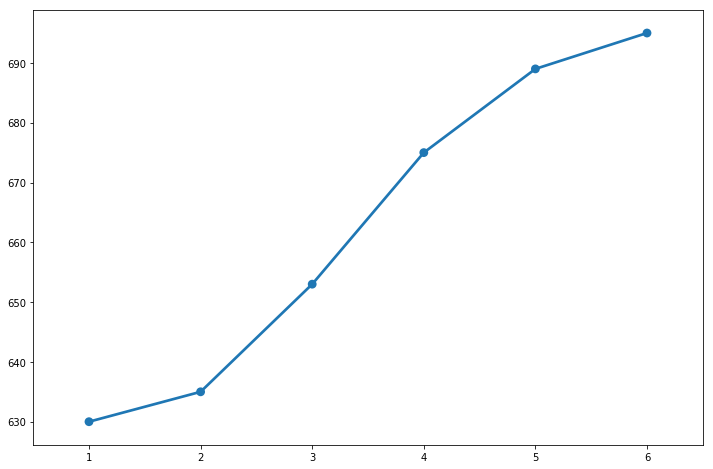

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,229704.0,904.240453,3123.090562,1.0,383.0,630.0,1013.0,86369.0
2,238298.0,897.439496,3057.137598,1.0,384.0,635.0,1022.0,86392.0
3,256189.0,937.365363,3213.214383,1.0,393.0,653.0,1052.0,86366.0
4,251645.0,962.891462,3158.773635,1.0,403.0,675.0,1097.0,86364.0
5,248486.0,999.451390,3186.782122,1.0,408.0,689.0,1133.0,86391.0
6,234316.0,1013.367226,3279.534457,1.0,414.0,695.0,1141.0,86387.0


In [42]:
df_train_agg = training_data.groupby('month')['trip_duration'].aggregate(np.median).reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(df_train_agg.month.values, df_train_agg.trip_duration.values)
plt.show()
training_data.groupby('month')['trip_duration'].describe()


In [43]:
# def rmsle(y_test, y_pred) : 
#     assert len(y_test) == len(y_pred)
#     return np.sqrt(np.mean((np.log(1+y_pred) - np.log(1+y_test))**2))
# kf = KFold(n_splits=3)
# neighbors_array=[]
# training_score=[]
# testing_score=[]
# for n_neighbors in range(1,10,2):
#     knn = KNeighborsRegressor(n_neighbors=n_neighbors)
#     print('\nEvaluating metrics with n_neighbors= ' + str(n_neighbors))
#     neighbors_array.append(n_neighbors)
#     ind_test_score=[]
#     ind_train_score=[]
    
#     for train_index, test_index in kf.split(training_data):
#         train_x = training_data.loc[train_index, ['hour', 'weekday', 'Eucl_distance']]
#         train_y = training_data.loc[train_index, ['trip_duration']]

#         test_x = training_data.loc[test_index, ['hour', 'weekday', 'Eucl_distance']]
#         test_y = training_data.loc[test_index, ['trip_duration']]

#         knn.fit(train_x, train_y)
#         y_pred_test = knn.predict(test_x)
#         y_pred_train = knn.predict(train_x)
        
#         ind_train_score.append(rmsle(train_y, y_pred_train))
#         ind_test_score.append(rmsle(test_y, y_pred_test))
#     training_score.append(np.mean(ind_train_score))
#     testing_score.append(np.mean(ind_test_score))

In [44]:
# kf = KFold(n_splits=3)
# neighbors_array=[]
# training_score=[]
# testing_score=[]
# for n_neighbors in range(1,10,2):
#     knn = KNeighborsRegressor(n_neighbors=n_neighbors)
#     print('\nEvaluating metrics with n_neighbors= ' + str(n_neighbors))
#     neighbors_array.append(n_neighbors)
#     ind_test_score=[]
#     ind_train_score=[]
    
#     for train_index, test_index in kf.split(training_data):
#         train_x = training_data.loc[train_index, ['hour', 'weekday', 'Eucl_distance','store_and_fwd_flag']]
#         train_y = training_data.loc[train_index, ['trip_duration']]

#         test_x = training_data.loc[test_index, ['hour', 'weekday', 'Eucl_distance','store_and_fwd_flag']]
#         test_y = training_data.loc[test_index, ['trip_duration']]

#         knn.fit(train_x, train_y)
#         y_pred_test = knn.predict(test_x)
#         y_pred_train = knn.predict(train_x)
        
#         ind_train_score.append(rmsle(train_y, y_pred_train))
#         ind_test_score.append(rmsle(test_y, y_pred_test))
#     training_score.append(np.mean(ind_train_score))
#     testing_score.append(np.mean(ind_test_score))

In [45]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
data = training_data['store_and_fwd_flag']
values = np.array(data)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

['N' 'N' 'N' ... 'N' 'N' 'N']
[0 0 0 ... 0 0 0]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [46]:
training_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,hour,weekday,month,Eucl_distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17,1,3,1.498991
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0,7,6,1.806074
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11,2,1,6.387103
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,19,3,4,1.485965
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,13,6,3,1.188962


In [47]:
pd.get_dummies(data)

,N,Y
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [48]:
final_train=training_data[['hour','weekday','trip_duration','Eucl_distance','store_and_fwd_flag']]

In [49]:
final_train=pd.get_dummies(final_train)

In [50]:
final_train

,hour,weekday,trip_duration,Eucl_distance,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,17,1,455,1.498991,1,0
1,0,7,663,1.806074,1,0
2,11,2,2124,6.387103,1,0
3,19,3,429,1.485965,1,0
4,13,6,435,1.188962,1,0
5,22,6,443,1.099287,1,0
6,22,5,341,1.326695,1,0
7,7,6,1551,5.716775,1,0
8,23,5,255,1.310765,1,0
9,21,4,1225,5.122769,1,0


In [51]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458638 entries, 0 to 1458643
Data columns (total 6 columns):
hour                    1458638 non-null int64
weekday                 1458638 non-null int64
trip_duration           1458638 non-null int64
Eucl_distance           1458638 non-null float64
store_and_fwd_flag_N    1458638 non-null uint8
store_and_fwd_flag_Y    1458638 non-null uint8
dtypes: float64(1), int64(3), uint8(2)
memory usage: 58.4 MB


In [52]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
id                    625134 non-null object
vendor_id             625134 non-null int64
pickup_datetime       625134 non-null datetime64[ns]
passenger_count       625134 non-null int64
pickup_longitude      625134 non-null float64
pickup_latitude       625134 non-null float64
dropoff_longitude     625134 non-null float64
dropoff_latitude      625134 non-null float64
store_and_fwd_flag    625134 non-null object
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 42.9+ MB


In [53]:
X=final_train[['hour','weekday','Eucl_distance','store_and_fwd_flag_N','store_and_fwd_flag_Y']]
y=final_train['trip_duration']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

X_train.shape, y_train.shape
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)


In [54]:
X_test.shape, y_test.shape


((437592, 5), (437592,))

In [55]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
reg.predict(X_test)

array([ 922.12235702, 2599.56095357,  928.99859694, ...,  640.11117853,
        671.63104104,  551.18815502])

In [56]:
def rmsle(y_test, y_pred) :
    assert len(y_test) == len(y_pred)
    return np.sqrt(np.mean((np.log(1+y_pred) - np.log(1+y_test))**2))

In [57]:
rmsle(y_test,reg.predict(X_test))

0.6712963228121047

In [58]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=10)
neigh.fit(X_train, y_train)
neigh.predict(X_test)

array([ 904.2, 2355.6,  789.4, ...,  425.9,  444.8,  631.5])

In [59]:
rmsle(y_test,neigh.predict(X_test))

0.597434145714923

In [60]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=20)
neigh.fit(X_train, y_train)
neigh.predict(X_test)
rmsle(y_test,neigh.predict(X_test))

0.6085158587396183

In [61]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
rf.fit(X_train, y_train)
rf.predict(X_test)
rmsle(y_test,rf.predict(X_test))

0.6103114119290025

In [62]:
testing_data.pickup_datetime = testing_data.pickup_datetime.apply(convert_datetime)
testing_data['hour'] = testing_data.pickup_datetime.apply(get_hour)
testing_data['weekday'] = testing_data.pickup_datetime.apply(get_weekday)
testing_data['month'] = testing_data.pickup_datetime.dt.month
testing_data['Eucl_distance'] = testing_data.apply(distance, axis=1)

In [63]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 13 columns):
id                    625134 non-null object
vendor_id             625134 non-null int64
pickup_datetime       625134 non-null datetime64[ns]
passenger_count       625134 non-null int64
pickup_longitude      625134 non-null float64
pickup_latitude       625134 non-null float64
dropoff_longitude     625134 non-null float64
dropoff_latitude      625134 non-null float64
store_and_fwd_flag    625134 non-null object
hour                  625134 non-null int64
weekday               625134 non-null int64
month                 625134 non-null int64
Eucl_distance         625134 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(5), object(2)
memory usage: 62.0+ MB


In [64]:
final_test= testing_data[['hour','weekday','Eucl_distance','store_and_fwd_flag']]

In [65]:
final_test.head()

,hour,weekday,Eucl_distance,store_and_fwd_flag
0,23,4,2.747288,N
1,23,4,2.760105,N
2,23,4,1.306565,N
3,23,4,5.270742,N
4,23,4,0.961143,N


In [66]:
final_test=pd.get_dummies(final_test)

In [67]:
final_test.head()

,hour,weekday,Eucl_distance,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,23,4,2.747288,1,0
1,23,4,2.760105,1,0
2,23,4,1.306565,1,0
3,23,4,5.270742,1,0
4,23,4,0.961143,1,0


In [69]:
p=pd.Series(reg.predict(final_test))

In [70]:
p

0          2972.267922
1          2978.720753
2          2246.931151
3          4242.709508
4          2073.027265
5          3697.390934
6          3358.129222
7          3090.378754
8         11083.306709
9          2505.716752
10         3982.876034
11         1986.143223
12         2356.855082
13         2903.849522
14         4326.832081
15         4010.075257
16         3397.062738
17         2469.788551
18         1936.849832
19         4389.829686
20         1962.294287
21         2588.370817
22         2447.344223
23         3978.201056
24         4228.287163
25         5382.571658
26         2851.375133
27         2138.524060
28         6744.181583
29         5619.885353
              ...     
625104     1683.562463
625105     1616.206272
625106     2106.996082
625107     1740.549045
625108     4879.972076
625109     2585.763734
625110     1248.916117
625111     3002.326106
625112     1654.126369
625113     1947.782636
625114     1885.473037
625115     8956.876838
625116     

In [71]:
submission = pd.DataFrame({
        "id":testing_data.id,
        "trip_duration": p
    })
submission.to_csv('submit_taxi.csv', index=False)